# Etivity 2
## Name: Martin Power
## ID      : 9939245

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./bank_et2.csv')

print("Numer of Samples  in Dataset:\t",df.shape[0])
print("Numer of Features in Dataset:\t",df.shape[1])

# Drop column 0
df = df.drop(df.columns[0], axis=1)

Numer of Samples  in Dataset:	 2000
Numer of Features in Dataset:	 20


In [3]:
# Examine the first few data rows
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
# Examine the last few data rows.
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
# Calculate statistics for the numerical attributes.

# Print statistical summary for all numerical attributes
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [6]:
# From https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
# The following code extracts the columns with categorical attributes

cat_var = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] # Categorical Varible

for var in cat_var:
    print("\n****\t",var,"\t****")
    print("Total Values = \t",df[var].count(),"\n")
    print(df[var].value_counts())
    print("****************************")


****	 job 	****
Total Values = 	 1990 

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64
****************************

****	 marital 	****
Total Values = 	 2000 

married     1111
single       674
divorced     215
Name: marital, dtype: int64
****************************

****	 education 	****
Total Values = 	 1896 

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64
****************************

****	 default 	****
Total Values = 	 2000 

no     1985
yes      15
Name: default, dtype: int64
****************************

****	 housing 	****
Total Values = 	 2000 

no     1037
yes     963
Name: housing, dtype: int64
****************************

****	 loan 	****
Total Values = 	 2000 

no     1750
yes     250
Name: loan, dtype: int64
**********************

In [7]:
df.apply(lambda x: sum(x.isnull()), axis=0)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [8]:
df.loc[df.isnull().sum(1)>2].index

Int64Index([804, 815, 831, 856, 896, 937, 944, 950, 1711, 1737], dtype='int64')

In [9]:
df.loc[ 804 , : ]

age                     37
job             technician
marital             single
education              NaN
default                 no
balance                391
ratio_bal_ln     -0.392207
ratio_ln_inc       1.77131
housing                yes
loan                    no
contact                NaN
day                      8
month                  may
duration               103
campaign                 3
pdays                   -1
previous                 0
poutcome               NaN
subscribed              no
Name: 804, dtype: object

In [10]:
df.loc[ 815 , : ]

age                       36
job             entrepreneur
marital              married
education                NaN
default                   no
balance                  298
ratio_bal_ln        0.369096
ratio_ln_inc        -1.40463
housing                  yes
loan                      no
contact                  NaN
day                        8
month                    may
duration                 215
campaign                   1
pdays                     -1
previous                   0
poutcome                 NaN
subscribed                no
Name: 815, dtype: object

In [11]:
df.loc[ 831 , : ]

age                   41
job                  NaN
marital           single
education        primary
default               no
balance             2398
ratio_bal_ln   -0.243804
ratio_ln_inc   -0.685437
housing              yes
loan                  no
contact              NaN
day                    8
month                may
duration             287
campaign               2
pdays                 -1
previous               0
poutcome             NaN
subscribed            no
Name: 831, dtype: object

In [12]:
df.loc[ 856 , : ]

age                      51
job             blue-collar
marital             married
education               NaN
default                  no
balance                 125
ratio_bal_ln       0.654737
ratio_ln_inc      0.0871077
housing                 yes
loan                     no
contact                 NaN
day                       8
month                   may
duration                102
campaign                  2
pdays                    -1
previous                  0
poutcome                NaN
subscribed               no
Name: 856, dtype: object

In [13]:
# https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
null_columns=df.columns[df.isnull().any()]
print(df[df["age"].isnull()][null_columns])

      age            job  education    contact poutcome
456   NaN  self-employed   tertiary   cellular  failure
472   NaN    blue-collar    primary  telephone  failure
526   NaN       services  secondary   cellular  failure
595   NaN     management   tertiary   cellular  failure
597   NaN  self-employed  secondary   cellular  failure
601   NaN         admin.  secondary   cellular  failure
605   NaN     management   tertiary   cellular  failure
744   NaN     management   tertiary   cellular  failure
795   NaN     technician   tertiary   cellular  success
1171  NaN        retired   tertiary   cellular  success
1232  NaN        student  secondary   cellular  success
1408  NaN  self-employed   tertiary   cellular      NaN


In [14]:
print(df[df["job"].isnull()][null_columns])

       age  job  education    contact poutcome
255   42.0  NaN    primary   cellular  failure
257   46.0  NaN        NaN   cellular  failure
831   41.0  NaN    primary        NaN      NaN
1223  55.0  NaN  secondary   cellular  success
1281  50.0  NaN        NaN   cellular  failure
1669  54.0  NaN  secondary   cellular  success
1711  77.0  NaN        NaN  telephone      NaN
1801  28.0  NaN        NaN   cellular  success
1868  48.0  NaN        NaN   cellular  failure
1975  45.0  NaN   tertiary   cellular      NaN


In [15]:
print(df[df["education"].isnull()][null_columns])

       age            job education    contact poutcome
10    38.0     management       NaN   cellular  failure
15    38.0    blue-collar       NaN   cellular  failure
124   39.0    blue-collar       NaN   cellular  failure
209   37.0     management       NaN   cellular  failure
257   46.0            NaN       NaN   cellular  failure
262   31.0    blue-collar       NaN   cellular  failure
285   51.0     technician       NaN   cellular  failure
324   41.0    blue-collar       NaN   cellular  failure
348   56.0         admin.       NaN   cellular  failure
381   43.0     management       NaN   cellular  failure
389   33.0     technician       NaN   cellular  failure
404   58.0     technician       NaN   cellular  failure
419   31.0       services       NaN   cellular  failure
442   35.0    blue-collar       NaN   cellular  failure
449   40.0    blue-collar       NaN   cellular  failure
521   46.0     technician       NaN   cellular  failure
527   52.0     technician       NaN   cellular  

In [16]:
print(df[df["age"].isnull()]["job"].unique())

jobs_with_missing_age = df[df["age"].isnull()]["job"].unique()
print(jobs_with_missing_age)

['self-employed' 'blue-collar' 'services' 'management' 'admin.'
 'technician' 'retired' 'student']
['self-employed' 'blue-collar' 'services' 'management' 'admin.'
 'technician' 'retired' 'student']


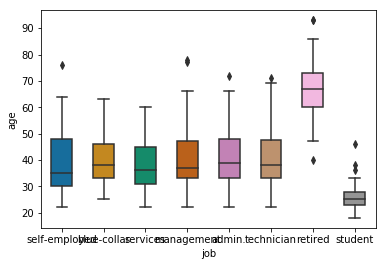

In [17]:
bplot = sns.boxplot(y='age', x='job', 
                 data=df, 
                 width=0.5,
                 palette="colorblind",
                 order=jobs_with_missing_age)

In [18]:
print(df[df["job"].isnull()]["age"].unique())

ages_with_missing_job = df[df["job"].isnull()]["age"].unique()
print(ages_with_missing_job)

[42. 46. 41. 55. 50. 54. 77. 28. 48. 45.]
[42. 46. 41. 55. 50. 54. 77. 28. 48. 45.]


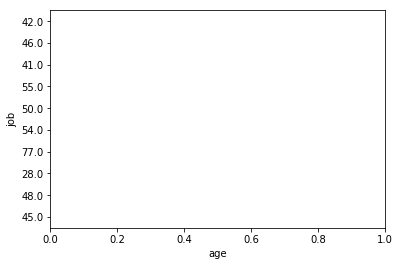

In [19]:
bplot = sns.boxplot(y='job', x='age', 
                 data=df, 
                 width=0.5,
                 palette="colorblind",
                 order=ages_with_missing_job)

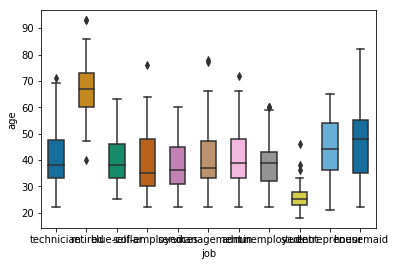

In [20]:
bplot = sns.boxplot(y='age', x='job', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

### Fill In Missing "Age" Values

In [21]:
# https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
null_columns=df.columns[df.isnull().any()]
print(df[df["age"].isnull()])

      age            job  marital  education default  balance  ratio_bal_ln  \
456   NaN  self-employed  married   tertiary      no      917      0.311161   
472   NaN    blue-collar  married    primary      no      474      0.729179   
526   NaN       services  married  secondary      no     2478      0.469463   
595   NaN     management  married   tertiary      no     1857     -0.137751   
597   NaN  self-employed  married  secondary     yes      254      0.800582   
601   NaN         admin.   single  secondary      no      111      0.269082   
605   NaN     management  married   tertiary      no     1330      1.007376   
744   NaN     management  married   tertiary      no      -61      0.638129   
795   NaN     technician   single   tertiary      no      992      0.901646   
1171  NaN        retired  married   tertiary      no     2812     -0.336489   
1232  NaN        student   single  secondary      no      431     -1.980588   
1408  NaN  self-employed   single   tertiary      no

['self-employed' 'blue-collar' 'services' 'management' 'admin.'
 'technician' 'retired' 'student']


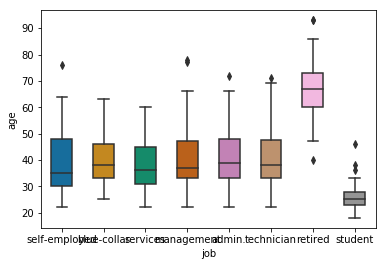

In [22]:
# Compare Jobs for People with Missing Ages
jobs_with_missing_age = df[df["age"].isnull()]["job"].unique()
print(jobs_with_missing_age)

bplot = sns.boxplot(y='age', x='job', 
                 data=df, 
                 width=0.5,
                 palette="colorblind",
                 order=jobs_with_missing_age)

['tertiary' 'primary' 'secondary']


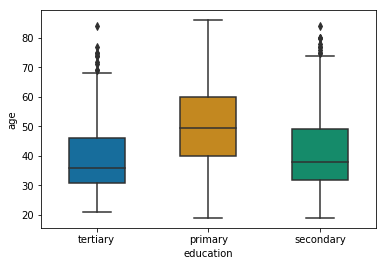

In [23]:
# Compare edu for People with Missing Ages
edu_with_missing_age = df[df["age"].isnull()]["education"].unique()
print(edu_with_missing_age)

bplot = sns.boxplot(y='age', x='education', 
                 data=df, 
                 width=0.5,
                 palette="colorblind",
                 order=edu_with_missing_age)

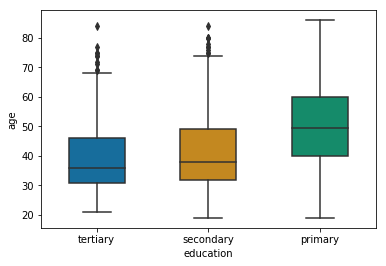

In [24]:
bplot = sns.boxplot(y='age', x='education', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

['married' 'single']


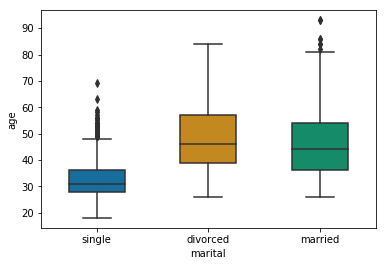

In [25]:
# Compare marital for People with Missing Ages
mar_with_missing_age = df[df["age"].isnull()]["marital"].unique()
print(mar_with_missing_age)

# bplot = sns.boxplot(y='age', x='marital', 
#                  data=df, 
#                  width=0.5,
#                  palette="colorblind",
#                 order=mar_with_missing_age)

bplot = sns.boxplot(y='age', x='marital', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [26]:
age_df = df.filter(['age', 'job',  'marital', 'education'], axis=1)
age_df.head()


,age,job,marital,education
0,32.0,technician,single,tertiary
1,39.0,technician,divorced,secondary
2,59.0,retired,married,secondary
3,47.0,blue-collar,married,secondary
4,54.0,retired,married,secondary


In [27]:
print(age_df.shape)
age_df = age_df.dropna(axis=0, how='any')
print(age_df.shape)

(2000, 4)
(1879, 4)


In [28]:
age_df = pd.get_dummies(age_df, columns=['job','marital', 'education'], drop_first=True)

In [29]:
age_df.describe()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,41.574242,0.152741,0.023417,0.018627,0.231506,0.080362,0.031400,0.083555,0.041511,0.174029,0.036189,0.555615,0.335285,0.526344,0.359766
std,12.487382,0.359833,0.151263,0.135239,0.421907,0.271925,0.174442,0.276793,0.199523,0.379235,0.186811,0.497030,0.472216,0.499438,0.480059
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
y = age_df[['age']].values
X = age_df[['job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','marital_married','marital_single','education_secondary','education_tertiary']].values

In [31]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))


0.4966718814632932


In [33]:
y_hat = clf.predict(X_test)
for i in range (len(y_test)):
    print(i,"\t Test\t",y_test[i],"\tPredict\t",y_hat[i],"\tDelta\t",y_test[i]-y_hat[i])


0 	 Test	 [62.] 	Predict	 65.13725490196079 	Delta	 [-3.1372549]
1 	 Test	 [22.] 	Predict	 44.25 	Delta	 [-22.25]
2 	 Test	 [65.] 	Predict	 58.888888888888886 	Delta	 [6.11111111]
3 	 Test	 [44.] 	Predict	 41.51111111111111 	Delta	 [2.48888889]
4 	 Test	 [53.] 	Predict	 44.1578947368421 	Delta	 [8.84210526]
5 	 Test	 [33.] 	Predict	 38.94915254237288 	Delta	 [-5.94915254]
6 	 Test	 [28.] 	Predict	 44.1578947368421 	Delta	 [-16.15789474]
7 	 Test	 [26.] 	Predict	 31.166666666666668 	Delta	 [-5.16666667]
8 	 Test	 [80.] 	Predict	 65.13725490196079 	Delta	 [14.8627451]
9 	 Test	 [34.] 	Predict	 32.7 	Delta	 [1.3]
10 	 Test	 [58.] 	Predict	 38.57142857142857 	Delta	 [19.42857143]
11 	 Test	 [36.] 	Predict	 31.727272727272727 	Delta	 [4.27272727]
12 	 Test	 [37.] 	Predict	 41.51111111111111 	Delta	 [-4.51111111]
13 	 Test	 [33.] 	Predict	 43.95238095238095 	Delta	 [-10.95238095]
14 	 Test	 [34.] 	Predict	 41.51111111111111 	Delta	 [-7.51111111]
15 	 Test	 [33.] 	Predict	 44.074766355140184 

165 	 Test	 [31.] 	Predict	 25.17391304347826 	Delta	 [5.82608696]
166 	 Test	 [37.] 	Predict	 30.6 	Delta	 [6.4]
167 	 Test	 [27.] 	Predict	 41.51111111111111 	Delta	 [-14.51111111]
168 	 Test	 [34.] 	Predict	 44.074766355140184 	Delta	 [-10.07476636]
169 	 Test	 [36.] 	Predict	 42.84375 	Delta	 [-6.84375]
170 	 Test	 [51.] 	Predict	 44.074766355140184 	Delta	 [6.92523364]
171 	 Test	 [60.] 	Predict	 44.074766355140184 	Delta	 [15.92523364]
172 	 Test	 [59.] 	Predict	 41.921052631578945 	Delta	 [17.07894737]
173 	 Test	 [36.] 	Predict	 31.727272727272727 	Delta	 [4.27272727]
174 	 Test	 [46.] 	Predict	 41.51111111111111 	Delta	 [4.48888889]
175 	 Test	 [45.] 	Predict	 41.921052631578945 	Delta	 [3.07894737]
176 	 Test	 [42.] 	Predict	 43.869565217391305 	Delta	 [-1.86956522]
177 	 Test	 [33.] 	Predict	 33.083333333333336 	Delta	 [-0.08333333]
178 	 Test	 [36.] 	Predict	 42.84375 	Delta	 [-6.84375]
179 	 Test	 [54.] 	Predict	 41.51111111111111 	Delta	 [12.48888889]
180 	 Test	 [23.] 	P

308 	 Test	 [33.] 	Predict	 41.51111111111111 	Delta	 [-8.51111111]
309 	 Test	 [43.] 	Predict	 44.1578947368421 	Delta	 [-1.15789474]
310 	 Test	 [34.] 	Predict	 33.76923076923077 	Delta	 [0.23076923]
311 	 Test	 [27.] 	Predict	 33.083333333333336 	Delta	 [-6.08333333]
312 	 Test	 [31.] 	Predict	 33.696 	Delta	 [-2.696]
313 	 Test	 [46.] 	Predict	 38.94915254237288 	Delta	 [7.05084746]
314 	 Test	 [28.] 	Predict	 33.696 	Delta	 [-5.696]
315 	 Test	 [53.] 	Predict	 41.921052631578945 	Delta	 [11.07894737]
316 	 Test	 [61.] 	Predict	 47.166666666666664 	Delta	 [13.83333333]
317 	 Test	 [33.] 	Predict	 33.696 	Delta	 [-0.696]
318 	 Test	 [58.] 	Predict	 41.921052631578945 	Delta	 [16.07894737]
319 	 Test	 [20.] 	Predict	 25.17391304347826 	Delta	 [-5.17391304]
320 	 Test	 [62.] 	Predict	 41.921052631578945 	Delta	 [20.07894737]
321 	 Test	 [66.] 	Predict	 44.1875 	Delta	 [21.8125]
322 	 Test	 [29.] 	Predict	 33.696 	Delta	 [-4.696]
323 	 Test	 [40.] 	Predict	 44.1875 	Delta	 [-4.1875]
32

In [34]:
# # Create the dataset from the dataframe
# X = df[['ratio_bal_ln', 'ratio_ln_inc']].values
# y_labels = df[['subscribed']].values
# y = [1 if yy == 'yes' else -1 for yy in y_labels] 

# # Print the Resulting Dataset
# print_dataset(X, y)

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
df['work_status'] = df['job']

In [36]:
df['work_status'].head(10)

0       technician
1       technician
2          retired
3      blue-collar
4          retired
5    self-employed
6      blue-collar
7         services
8       management
9       management
Name: work_status, dtype: object

In [37]:
#df.replace({'work_status': {'management'   : 'available',        
#'retired'   : 'xretired',          
#'#student'   : 'xstudent'}})
# https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict
#di = {'technician','management': "magician", 
#      'retired': "coffin", 
#      'services' : "coffin"}
di = {'management'    : 'available',       
      'technician'   : 'available',      
      'blue-collar'   : 'available',      
      'admin.'        : 'available',           
      'services'      : 'available',          
      'unemployed'    : 'available',        
      'self-employed' : 'available',     
      'entrepreneur'  : 'available',      
      'housemaid'     : 'available'}   
df['work_status'].replace(di, inplace=True)
df['work_status'].head(10)

0    available
1    available
2      retired
3    available
4      retired
5    available
6    available
7    available
8    available
9    available
Name: work_status, dtype: object

In [38]:
df['work_status'].head()

0    available
1    available
2      retired
3    available
4      retired
Name: work_status, dtype: object

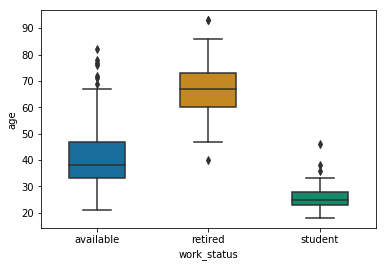

In [39]:
# Compare Work Status for Peopl
bplot = sns.boxplot(y='age', x='work_status', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [40]:
df['has_been_married'] = df['marital']
df['has_been_married'].head(10)
di = {'divorced'    : 'yes',       
      'married'     : 'yes',      
      'single'      : 'no'}   
df['has_been_married'].replace(di, inplace=True)
df['has_been_married'].head(10)

0     no
1    yes
2    yes
3    yes
4    yes
5    yes
6    yes
7    yes
8    yes
9    yes
Name: has_been_married, dtype: object

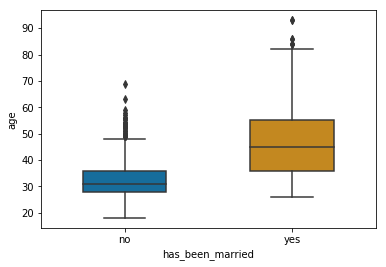

In [41]:
# Compare Work Status for Peopl
bplot = sns.boxplot(y='age', x='has_been_married', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [42]:
df['post_primary'] = df['education']
df['post_primary'].head(10)
di = {'tertiary'    : 'yes',       
      'secondary'   : 'yes',      
      'primary'     : 'no'}   
df['post_primary'].replace(di, inplace=True)
df['post_primary'].head(10)

0    yes
1    yes
2    yes
3    yes
4    yes
5    yes
6    yes
7    yes
8    yes
9    yes
Name: post_primary, dtype: object

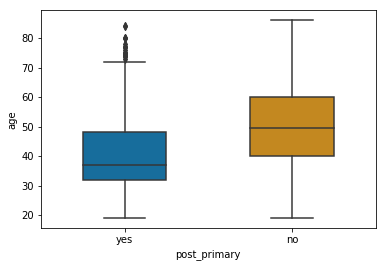

In [43]:
# Compare Work Status for Peopl
bplot = sns.boxplot(y='age', x='post_primary', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In [44]:
df.head()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,...,month,duration,campaign,pdays,previous,poutcome,subscribed,work_status,has_been_married,post_primary
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,...,apr,957,2,131,2,failure,no,available,no,yes
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,...,apr,233,2,133,1,failure,no,available,yes,yes
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,...,apr,126,2,239,1,failure,no,retired,yes,yes
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,...,apr,274,1,238,2,failure,no,available,yes,yes
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,...,apr,479,1,307,1,failure,no,retired,yes,yes


In [47]:
age2_df = df.filter(['age', 'work_status',  'has_been_married', 'post_primary'], axis=1)
age2_df.head()

,age,work_status,has_been_married,post_primary
0,32.0,available,no,yes
1,39.0,available,yes,yes
2,59.0,retired,yes,yes
3,47.0,available,yes,yes
4,54.0,retired,yes,yes


In [48]:
print(age2_df.shape)
age2_df = age2_df.dropna(axis=0, how='any')
print(age2_df.shape)

age2_df = pd.get_dummies(age2_df, columns=['work_status',  'has_been_married', 'post_primary'], drop_first=True)

age2_df.head()

(2000, 4)
(1879, 4)


,age,work_status_retired,work_status_student,has_been_married_yes,post_primary_yes
0,32.0,0,0,0,1
1,39.0,0,0,1,1
2,59.0,1,0,1,1
3,47.0,0,0,1,1
4,54.0,1,0,1,1


In [49]:
age2_df.describe()

,age,work_status_retired,work_status_student,has_been_married_yes,post_primary_yes
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,41.574242,0.080362,0.041511,0.664715,0.886110
std,12.487382,0.271925,0.199523,0.472216,0.317763
min,19.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,1.000000
50%,38.000000,0.000000,0.000000,1.000000,1.000000
75%,49.000000,0.000000,0.000000,1.000000,1.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
y = age2_df[['age']].values
X = age2_df[['work_status_retired','work_status_student', 'has_been_married_yes', 'post_primary_yes']].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
clf2 = tree.DecisionTreeRegressor()
clf2 = clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))

y_hat = clf2.predict(X_test)
for i in range (len(y_test)):
    print(i,"\t Test\t",y_test[i],"\tPredict\t",y_hat[i],"\tDelta\t",y_test[i]-y_hat[i])

0.5159764943681391
0 	 Test	 [62.] 	Predict	 64.54545454545455 	Delta	 [-2.54545455]
1 	 Test	 [22.] 	Predict	 33.750577367205544 	Delta	 [-11.75057737]
2 	 Test	 [65.] 	Predict	 64.54545454545455 	Delta	 [0.45454545]
3 	 Test	 [44.] 	Predict	 42.70650730411687 	Delta	 [1.2934927]
4 	 Test	 [53.] 	Predict	 46.407407407407405 	Delta	 [6.59259259]
5 	 Test	 [33.] 	Predict	 42.70650730411687 	Delta	 [-9.7065073]
6 	 Test	 [28.] 	Predict	 46.407407407407405 	Delta	 [-18.40740741]
7 	 Test	 [26.] 	Predict	 33.750577367205544 	Delta	 [-7.75057737]
8 	 Test	 [80.] 	Predict	 64.54545454545455 	Delta	 [15.45454545]
9 	 Test	 [34.] 	Predict	 42.70650730411687 	Delta	 [-8.7065073]
10 	 Test	 [58.] 	Predict	 46.407407407407405 	Delta	 [11.59259259]
11 	 Test	 [36.] 	Predict	 33.750577367205544 	Delta	 [2.24942263]
12 	 Test	 [37.] 	Predict	 42.70650730411687 	Delta	 [-5.7065073]
13 	 Test	 [33.] 	Predict	 42.70650730411687 	Delta	 [-9.7065073]
14 	 Test	 [34.] 	Predict	 42.70650730411687 	Delta	 [

141 	 Test	 [45.] 	Predict	 42.70650730411687 	Delta	 [2.2934927]
142 	 Test	 [37.] 	Predict	 42.70650730411687 	Delta	 [-5.7065073]
143 	 Test	 [54.] 	Predict	 42.70650730411687 	Delta	 [11.2934927]
144 	 Test	 [33.] 	Predict	 42.70650730411687 	Delta	 [-9.7065073]
145 	 Test	 [36.] 	Predict	 33.750577367205544 	Delta	 [2.24942263]
146 	 Test	 [29.] 	Predict	 42.70650730411687 	Delta	 [-13.7065073]
147 	 Test	 [34.] 	Predict	 42.70650730411687 	Delta	 [-8.7065073]
148 	 Test	 [53.] 	Predict	 42.70650730411687 	Delta	 [10.2934927]
149 	 Test	 [37.] 	Predict	 42.70650730411687 	Delta	 [-5.7065073]
150 	 Test	 [34.] 	Predict	 42.70650730411687 	Delta	 [-8.7065073]
151 	 Test	 [30.] 	Predict	 33.750577367205544 	Delta	 [-3.75057737]
152 	 Test	 [48.] 	Predict	 42.70650730411687 	Delta	 [5.2934927]
153 	 Test	 [43.] 	Predict	 42.70650730411687 	Delta	 [0.2934927]
154 	 Test	 [40.] 	Predict	 42.70650730411687 	Delta	 [-2.7065073]
155 	 Test	 [64.] 	Predict	 69.45652173913044 	Delta	 [-5.456

311 	 Test	 [27.] 	Predict	 33.750577367205544 	Delta	 [-6.75057737]
312 	 Test	 [31.] 	Predict	 33.750577367205544 	Delta	 [-2.75057737]
313 	 Test	 [46.] 	Predict	 42.70650730411687 	Delta	 [3.2934927]
314 	 Test	 [28.] 	Predict	 33.750577367205544 	Delta	 [-5.75057737]
315 	 Test	 [53.] 	Predict	 42.70650730411687 	Delta	 [10.2934927]
316 	 Test	 [61.] 	Predict	 46.407407407407405 	Delta	 [14.59259259]
317 	 Test	 [33.] 	Predict	 33.750577367205544 	Delta	 [-0.75057737]
318 	 Test	 [58.] 	Predict	 42.70650730411687 	Delta	 [15.2934927]
319 	 Test	 [20.] 	Predict	 25.508474576271187 	Delta	 [-5.50847458]
320 	 Test	 [62.] 	Predict	 42.70650730411687 	Delta	 [19.2934927]
321 	 Test	 [66.] 	Predict	 42.70650730411687 	Delta	 [23.2934927]
322 	 Test	 [29.] 	Predict	 33.750577367205544 	Delta	 [-4.75057737]
323 	 Test	 [40.] 	Predict	 42.70650730411687 	Delta	 [-2.7065073]
324 	 Test	 [42.] 	Predict	 46.407407407407405 	Delta	 [-4.40740741]
325 	 Test	 [31.] 	Predict	 42.70650730411687 	

In [67]:
idx = df.loc[df['age'].isnull()].index
print(idx)
#print(idx[0])
#print(df['age'][idx[0]])
#df.loc[idx[0], 'age'] = 11
#print(df['age'][idx[0]])

Int64Index([744, 795, 1171, 1232, 1408], dtype='int64')


In [89]:
#age2_df[['0'],['work_status_retired','work_status_student', 'has_been_married_yes', 'post_primary_yes']].values
age2_df.head()
age2_df['work_status_retired','work_status_student'][0]

X = age2_df['work_status_retired'][0],age2_df['work_status_student'][0]

KeyError: ('work_status_retired', 'work_status_student')